## Import Required library

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#List of countries
#This will be used to remove bad names. example(Africa, south-east-Asia, and combined country names)
countries = ['Austria',
 'Switzerland',
 'United Arab Emirates',
 'India',
 'Chile',
 'Russian Federation',
 'Belgium, Norway',
 "People's Republic of China",
 'Netherlands',
 'Saudi Arabia',
 'Poland',
 'Italy, Greece',
 'Papua New Guinea',
'Ireland',
 'Chinese Taipei',
 'Mexico',
 'New Zealand',
 'Bulgaria',
 'Sweden',
 'Croatia',
 'Japan',
 'Norway',
 'Australia',
 'Canada',
 'Italy',
 'Qatar',
 'Denmark',
 'Algeria',
 'Poland, Lithuania, Latvia',
 'Belgium',
 'Unknown (Europe)',
 'United States',
 'France',
 'Lybia',
 'Singapore',
 'Germany, Norway',
 'Thailand',
 'Portugal',
 'Germany',
 'Hungary',
 'Brazil',
 'Bahrain',
 'Iceland',
 'Unknown',
 'Indonesia',
 'Malaysia',
 'Greece',
 'Finland',
 'Oman',
 'Netherlands, Germany',
 'United Kingdom',
 'Korea',
 'China']


## Read IEA CCUS data

In [3]:
# Load dataset and select required columns
cc_columns_to_select = ['Country', 'Announcement','Project Status','Sector',\
                     'Announced capacity (low) (Mt CO2/yr)',\
                        'Announced capacity (high) (Mt CO2/yr)']

cc_data = pd.read_excel('data/IEA CCUS Projects Database 2023.xlsx',\
                   sheet_name = 'CCUS Projects Database', usecols=cc_columns_to_select)

#clean country column
cc_data = cc_data.loc[cc_data['Country'].isin(countries)]

# Display the first few rows of the dataset
display(cc_data.head())

cc_data.info()

,Country,Announcement,Project Status,Announced capacity (low) (Mt CO2/yr),Announced capacity (high) (Mt CO2/yr),Sector
0,France,2019.0,Planned,1.0,1.0,Iron and steel
1,United States,2022.0,Planned,NaN,NaN,Hydrogen/ammonia
2,United Arab Emirates,2007.0,Operational,0.8,0.8,Iron and steel
3,United Arab Emirates,2020.0,Planned,1.9,1.9,Natural gas processing
4,United Arab Emirates,2020.0,Planned,2.3,2.3,Natural gas processing


<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 572
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                568 non-null    object 
 1   Announcement                           548 non-null    float64
 2   Project Status                         568 non-null    object 
 3   Announced capacity (low) (Mt CO2/yr)   420 non-null    float64
 4   Announced capacity (high) (Mt CO2/yr)  420 non-null    float64
 5   Sector                                 568 non-null    object 
dtypes: float64(3), object(3)
memory usage: 31.1+ KB


## Read World Emission Data

In [4]:
#Read world Emission
emission_col = ['country', 'year','total_ghg']
emission_data = pd.read_csv('data/World Emission Data.csv', usecols  = emission_col)

#Clean Country
emission_data = emission_data.loc[emission_data['country'].isin(countries)]

#Get only years with complete data
emission_data = emission_data.loc[emission_data['year'] < 2021]

#view head
display(emission_data.tail())

#view info
emission_data.info()

,country,year,total_ghg
13097,United States,2016.0,5783.00
13098,United States,2017.0,5728.79
13099,United States,2018.0,5935.52
13100,United States,2019.0,5819.48
13101,United States,2020.0,5289.13


<class 'pandas.core.frame.DataFrame'>
Index: 2091 entries, 212 to 13101
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    2091 non-null   object 
 1   year       2091 non-null   float64
 2   total_ghg  2091 non-null   float64
dtypes: float64(2), object(1)
memory usage: 65.3+ KB


In [5]:
#change year from float to int
emission_data['year'] = emission_data['year'].astype('int')
#filter emission to >= 2006
emission_data = emission_data.loc[emission_data['year'] >= 2006]
#conver total_ghg from tones to metric tones
tons_to_metric_tons = 0.907185

# Applying lambda function to convert Tones to Metric Tones
emission_data['total_ghg'] = emission_data['total_ghg'].apply(lambda x: x * tons_to_metric_tons).round(2)
#print head
emission_data.head()

,country,year,total_ghg
248,Algeria,2006,177.25
249,Algeria,2007,180.31
250,Algeria,2008,184.90
251,Algeria,2009,186.59
252,Algeria,2010,189.20


In [6]:
# Basic information about the dataset
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 572
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                568 non-null    object 
 1   Announcement                           548 non-null    float64
 2   Project Status                         568 non-null    object 
 3   Announced capacity (low) (Mt CO2/yr)   420 non-null    float64
 4   Announced capacity (high) (Mt CO2/yr)  420 non-null    float64
 5   Sector                                 568 non-null    object 
dtypes: float64(3), object(3)
memory usage: 31.1+ KB


In [7]:
#Aggrigate by year, sector, country, and Project stauts
group_col  = ['Country', 'Announcement','Project Status','Sector']
val = {'Announced capacity (low) (Mt CO2/yr)':'sum','Announced capacity (high) (Mt CO2/yr)':'sum'}

#convert to data frame and reset index.  
cc_announced_capacity = pd.DataFrame(cc_data.groupby(group_col).aggregate(val)).reset_index().round(2).sort_values(by= 'Announcement' , ascending= False)

#Convert annaouncment yeat to int
cc_announced_capacity['Announcement'] = cc_announced_capacity['Announcement'].astype(int)

#view head
cc_announced_capacity['Country'].head()

99       Germany
16     Australia
92        France
170       Norway
98       Germany
Name: Country, dtype: object

## Explore Carbon Capture Data from IEA

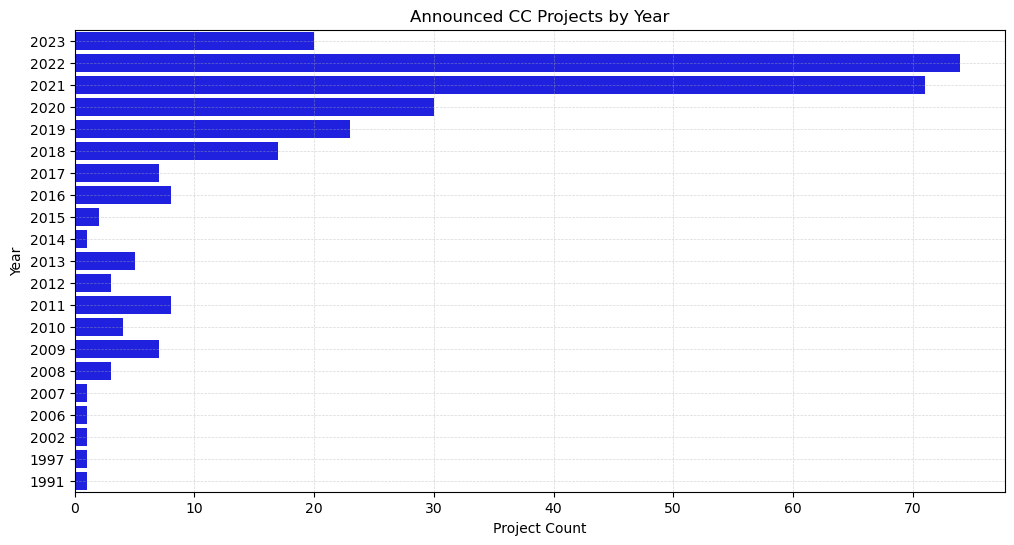

In [8]:
# Plot announced projects over years
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
sns.countplot(y='Announcement', data=cc_announced_capacity,\
               order= cc_announced_capacity['Announcement'].value_counts().index.sort_values(ascending= False),
               color='blue')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Add labels and title
plt.title('Announced CC Projects by Year')
plt.xlabel('Project Count')
plt.ylabel('Year')
# Show the plot
plt.show()


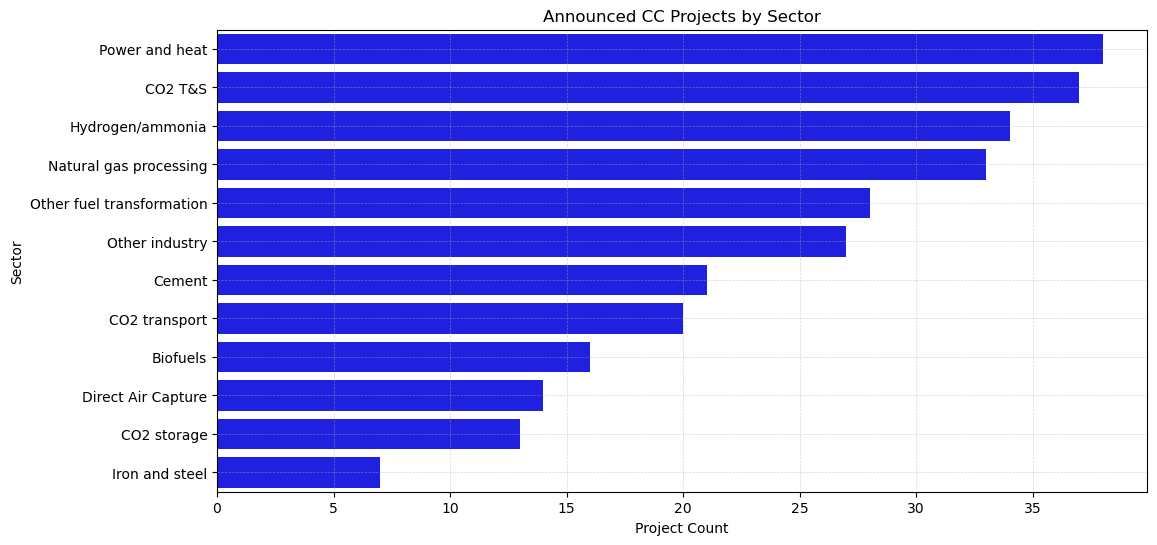

In [9]:
# Plot announced projects by sector
project_count_by_sector = pd.DataFrame(cc_announced_capacity['Sector'].\
                                       value_counts().sort_values(ascending= False).reset_index())
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
sns.barplot(y='Sector', x = 'count',data=project_count_by_sector,color='blue')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Add labels and title
plt.title('Announced CC Projects by Sector')
plt.xlabel('Project Count')
plt.ylabel('Sector')
# Show the plot
plt.show()

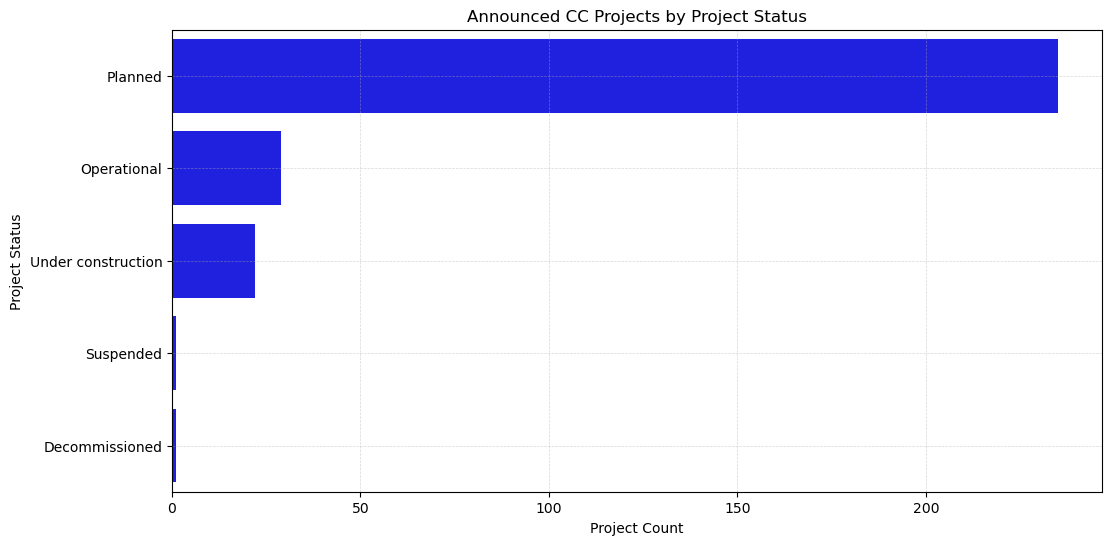

In [10]:
# Plot announced projects status
project_count_by_status = pd.DataFrame(cc_announced_capacity['Project Status'].value_counts().sort_values(ascending= False).reset_index())
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
sns.barplot(y='Project Status', x = 'count',data = project_count_by_status,color='blue')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Add labels and title
plt.title('Announced CC Projects by Project Status')
plt.xlabel('Project Count')
plt.ylabel('Project Status')
# Show the plot
plt.show()


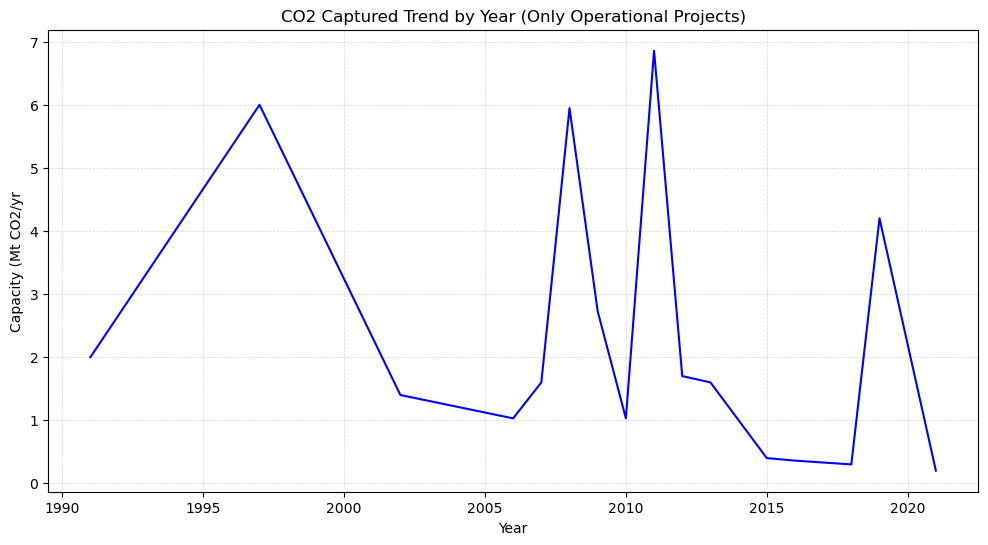

In [11]:
#Filter out palnned, and under constraction CCUS projects
high_low_capacity = cc_announced_capacity.loc[cc_announced_capacity['Project Status'].isin(['Operational', 'Suspended','Decommissioned'])]

#plot Announced high and low Carbon Capture 
#get columns required
high_low_capacity = high_low_capacity[['Announcement','Announced capacity (low) (Mt CO2/yr)','Announced capacity (high) (Mt CO2/yr)',]]


#aggrigate capacity to yearly level
high_low_capacity.groupby('Announcement').agg({'Announced capacity (low) (Mt CO2/yr)':'sum','Announced capacity (high) (Mt CO2/yr)':'sum'})
high_low_capacity['max capacity'] = high_low_capacity['Announced capacity (low) (Mt CO2/yr)'] +  high_low_capacity['Announced capacity (high) (Mt CO2/yr)'] 



#plot
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
sns.lineplot(y='max capacity', x = 'Announcement',data=high_low_capacity,color='blue',ci=None)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Add labels and title
plt.title('CO2 Captured Trend by Year (Only Operational Projects)')
plt.xlabel('Year')
plt.ylabel('Capacity (Mt CO2/yr')
# Show the plot
plt.show()

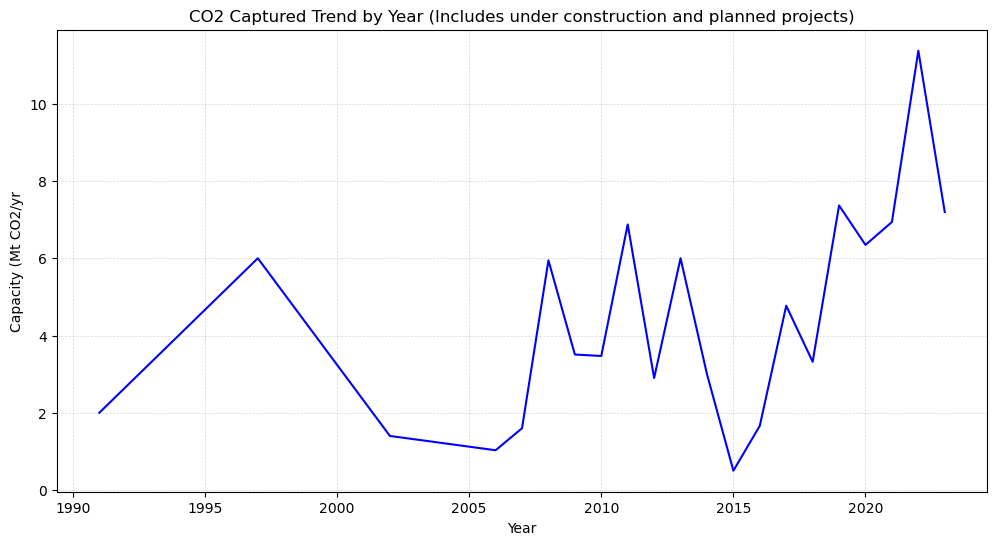

In [12]:
#Filter out palnned, and under constraction CCUS projects
all_projects = cc_announced_capacity[['Announcement','Announced capacity (low) (Mt CO2/yr)','Announced capacity (high) (Mt CO2/yr)','Project Status']]
#aggrigate capacity to yearly level
all_projects.groupby(['Announcement','Project Status']).agg({'Announced capacity (low) (Mt CO2/yr)':'sum','Announced capacity (high) (Mt CO2/yr)':'sum'})
all_projects['max capacity'] = all_projects['Announced capacity (low) (Mt CO2/yr)'] +  all_projects['Announced capacity (high) (Mt CO2/yr)'] 

#plot
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
sns.lineplot(data = all_projects, x = 'Announcement', y = 'max capacity', color = 'blue',ci=None)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Add labels and title
plt.title('CO2 Captured Trend by Year (Includes under construction and planned projects)')
plt.xlabel('Year')
plt.ylabel('Capacity (Mt CO2/yr')
# Show the plot
plt.show()

## Explore World Emission Data

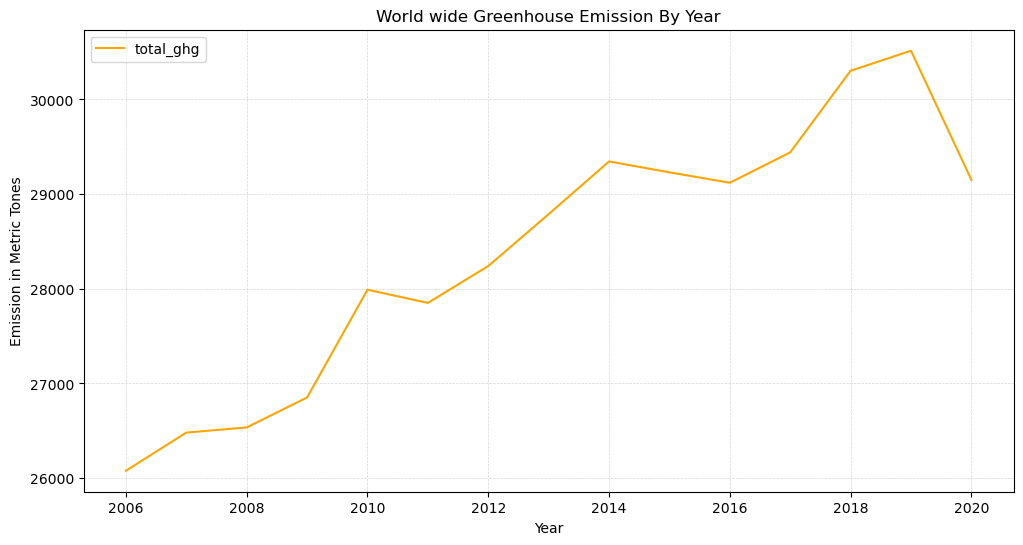

In [13]:
#Aggrigate emission data to yearly level
yearly_emission  = emission_data.groupby('year').agg({'total_ghg':'sum'})

yearly_emission.plot(figsize= (12,6),kind = 'line',color = 'orange')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('World wide Greenhouse Emission By Year')
plt.xlabel('Year')
plt.ylabel('Emission in Metric Tones')
plt.show()

In [14]:
#Aggrigate emission data to countery level
ten_year_emission  = emission_data.groupby('country').agg({'total_ghg':'sum'})

#calculate avarge 10 year emission 
calc_meadian = ten_year_emission.median()[0]

#Fillter all countery that have emmion value greater than median value
ten_year_emission_above_median_value = ten_year_emission.loc[ten_year_emission['total_ghg'] >=  calc_meadian]

#Fillter all countery that have emmion value less than median value
ten_year_emission_below_median_value = ten_year_emission.loc[ten_year_emission['total_ghg'] <  calc_meadian]


print(f"Ten year median emiisson is  {calc_meadian} Metric Tone")
print('-'*100)
print(f"{ten_year_emission_above_median_value.shape[0]} countries have total 10 year gh emission above 10 year median value")
print('-'*100)

print(f"{ten_year_emission_below_median_value.shape[0]} countries have total 10 year gh emission below 10 year median value")
print('-'*100)

Ten year median emiisson is  1523.84 Metric Tone
----------------------------------------------------------------------------------------------------
21 countries have total 10 year gh emission above 10 year median value
----------------------------------------------------------------------------------------------------
20 countries have total 10 year gh emission below 10 year median value
----------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Top countries by Green House Emission')

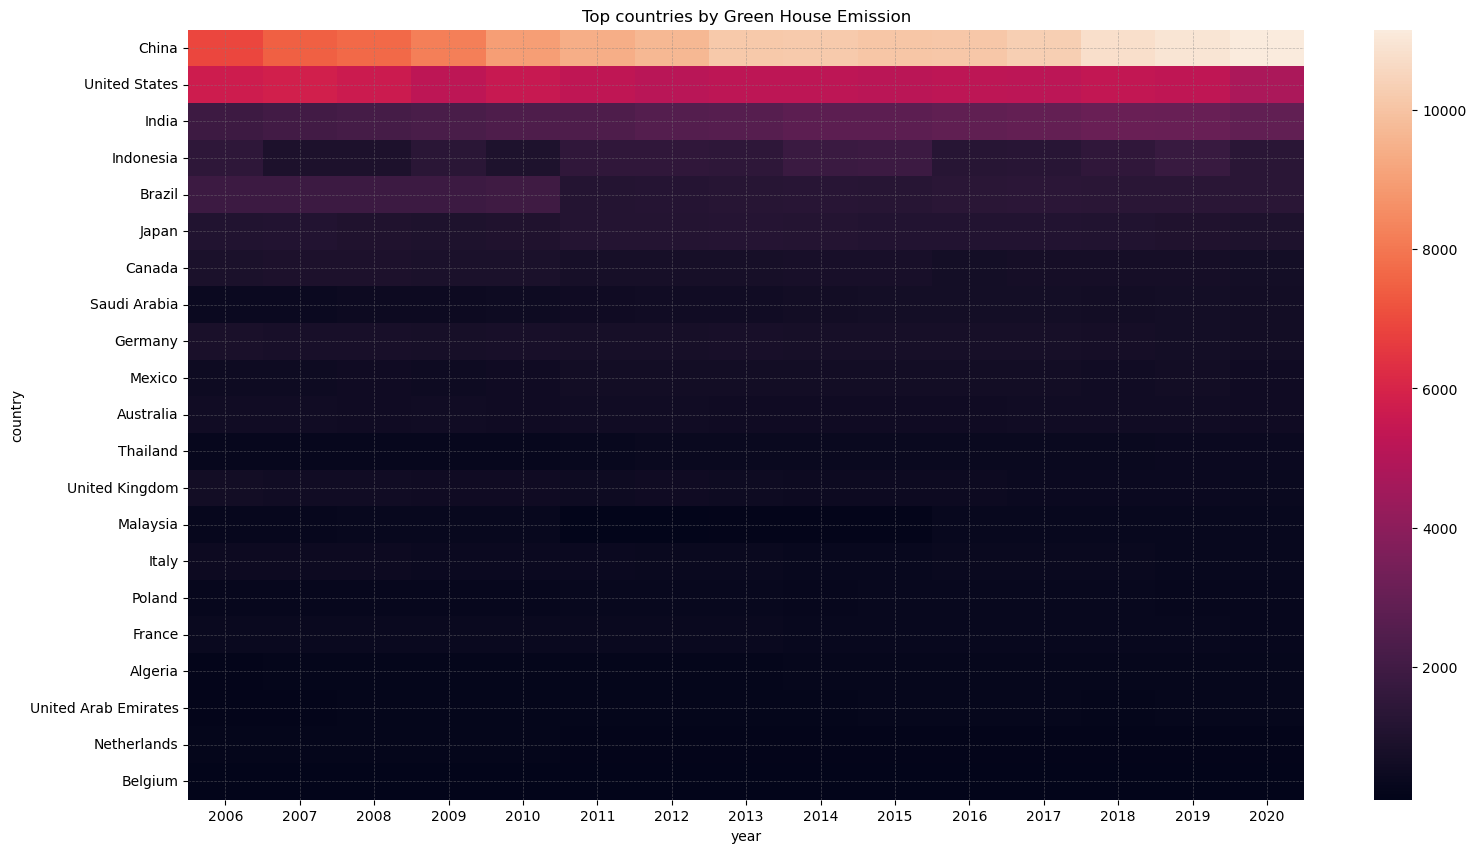

In [15]:
#list of top countries
top_countries = ten_year_emission_above_median_value.index.to_list()

#Filter top counties 
emission_data_top_country = emission_data.loc[emission_data['country'].isin(top_countries)]

#Plot to show top countries emission trend
top_crosstb = pd.crosstab(index= emission_data_top_country.country,columns= emission_data_top_country.\
                          year,values=emission_data_top_country.total_ghg,aggfunc= 'sum').sort_values(by = 2020,ascending= False)
plt.figure(figsize=(18, 10))
sns.heatmap(top_crosstb)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.title("Top countries by Green House Emission")


Text(0.5, 1.0, 'Bottom countries by Green House Emission')

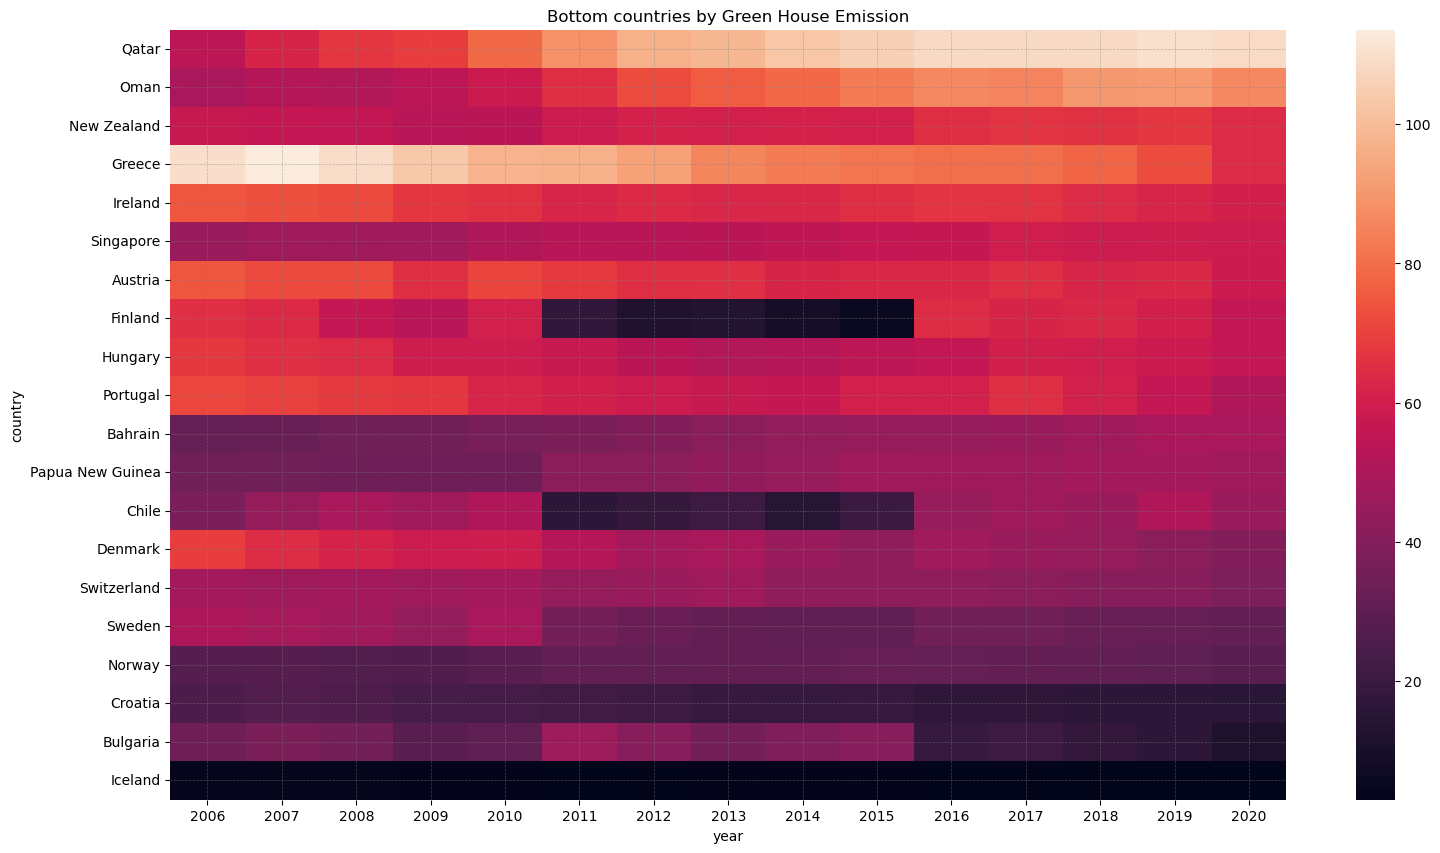

In [16]:
#list of bottom countries
top_countries = ten_year_emission_below_median_value.index.to_list()

#Filter bottom counties 
emission_data_bottom_country = emission_data.loc[emission_data['country'].isin(top_countries)]

#Plot to show top countries emission trend
top_crosstb = pd.crosstab(index= emission_data_bottom_country.country,columns= emission_data_bottom_country.\
                          year,values=emission_data_bottom_country.total_ghg,aggfunc= 'sum').sort_values(by = 2020,ascending= False)
plt.figure(figsize=(18, 10))
sns.heatmap(top_crosstb)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.title("Bottom countries by Green House Emission")

## Aggregate both data set by year and combine 

In [17]:
#filter cc data to 2006 and above 
ten_year_cc_captured = high_low_capacity.loc[high_low_capacity['Announcement'] >= 2006]

#Reanme columns
ten_year_cc_captured.rename(columns= {'Announcement':'year'},inplace=True)

#Set year as index
ten_year_cc_captured.set_index('year',inplace= True)

#Combine both data set
emission_cc_data = pd.merge(ten_year_cc_captured, yearly_emission, left_index=True, right_index=True)


Text(0, 0.5, 'Value in MT OC2')

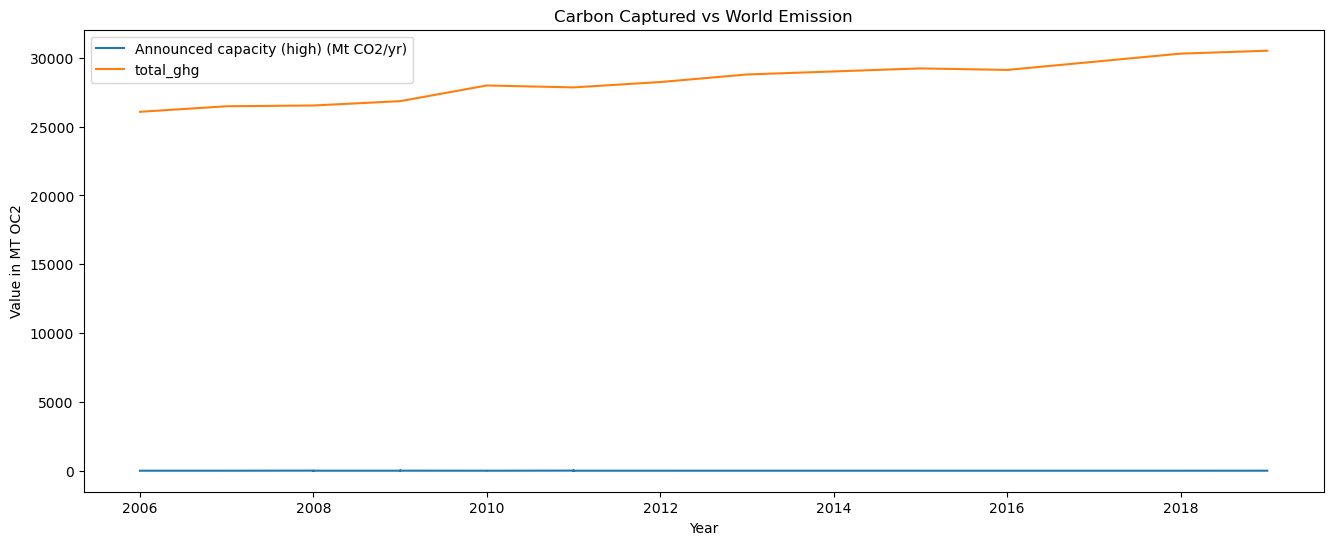

In [18]:
emission_cc_data[['Announced capacity (high) (Mt CO2/yr)','total_ghg']].plot(figsize= (16,6), title = 'Carbon Captured vs World Emission',kind = 'line')
plt.xlabel('Year')
plt.ylabel('Value in MT OC2')

## Aggrigate both data set to country and year and select only maximum capacity from carbn capture data

In [19]:
# Aggregate emission data
cc_max_captured_data =  cc_data[['Country','Announcement','Announced capacity (high) (Mt CO2/yr)']].\
    groupby(['Country','Announcement',]).agg({'Announced capacity (high) (Mt CO2/yr)':'sum'}).reset_index()

#Rename columns
cc_max_captured_data.rename(columns={'Announcement':'year','Country':'country','Announced capacity (high) (Mt CO2/yr)':'max_capacity_mt'},inplace= True)

#change cc data year to int
cc_max_captured_data['year'] = cc_max_captured_data['year'].astype('int')

#Combine both data set on country and year
cc_emission_data= pd.merge(emission_data, cc_max_captured_data, on=['country', 'year'])

#print head
cc_emission_data.isna().sum()

#save data for further analysis
cc_emission_data.to_csv('data/cleaned_data.csv',index=False)